## Eye-tracking mit OpenCV

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
print("cv version: ", cv2.__version__)
print("np version: ", np.__version__)
print("pd version: ", pd.__version__)


cv version:  4.5.5
np version:  1.21.6
pd version:  1.3.5


In [3]:
faceCascade = cv2.CascadeClassifier("./opencv/data/haarcascades/haarcascade_frontalface_default.xml")
eyeCascade = cv2.CascadeClassifier("./opencv/data/haarcascades/haarcascade_eye.xml")
#faceCascade = cv2.CascadeClassifier(cv2.data.haarcascade + "haarcascade_frontalface_default.xml")
#eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascade + "haarcascade_eye.xml")

In [5]:
detector_params = cv2.SimpleBlobDetector_Params()
detector_params.filterByArea = True
detector_params.maxArea = 1500
detector = cv2.SimpleBlobDetector_create(detector_params)

(array([[192, 271, 140, 140],
       [504, 257, 149, 149]], dtype=int32), array([151, 131], dtype=int32))
eye_gray shape: (105, 140)
eye_gray shape: (112, 149)
(array([[129,  58,  43,  43],
       [ 40,  57,  44,  44]], dtype=int32), array([118, 128], dtype=int32))
eye_gray shape: (33, 43)
eye_gray shape: (33, 44)
(array([[102, 127,  76,  76],
       [265, 131,  75,  75]], dtype=int32), array([232, 221], dtype=int32))
eye_gray shape: (57, 76)
eye_gray shape: (57, 75)


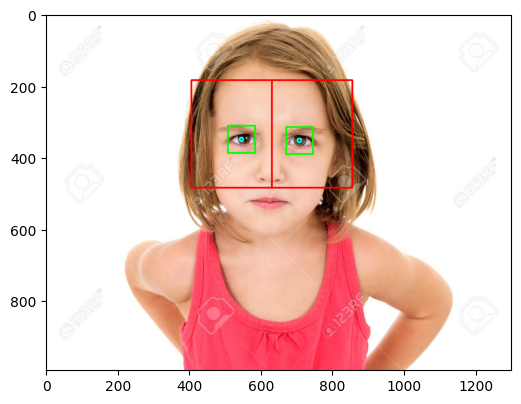

In [6]:
def search_eyes(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale2(img_gray)
    face_size = 0
    biggest_face = None
    img_face = img_rgb.copy()
    for face in faces[0]:
        #find biggest one
        x, y, w, h = face
        if w*h > face_size:
            face_size = w*h
            biggest_face = face
    x, y, w, h = biggest_face
    img_face = cv2.rectangle(img_face, (x,y), (int(x+w//2), int(y+h//1.5)), (255,0,0),3)
    img_face = cv2.rectangle(img_face, (int(x+w//2),y), (x+w, int(y+h//1.5)), (255,0,0),3)
    gray_face = img_gray[y:int(y+h//2), x:x+w]
    face_pic = img_face[y:int(y+h//2), x:x+w]
    eyes = eyeCascade.detectMultiScale2(gray_face)
    #img_eyes = img_face.copy()
    print(eyes)
    for number, eye in enumerate(eyes[0]):
        x, y, w, h = eye
        face_pic = cv2.rectangle(face_pic, (x,y), (x+w, y+h), (0,255,0),3)
        eye_center = (x+w//2, y+h//2)
        face_pic = cv2.circle(face_pic, eye_center,5, (0,255,255), 3)
        eye_gray = gray_face[y+h//4:y+h, x:x+w]
        print("eye_gray shape:", eye_gray.shape)
        eye_thr = cv2.threshold(eye_gray, 50, 255, cv2.THRESH_BINARY)
        #print("eye_thr.shape", eye_thr)
        #cv2.imshow("eye",eye_thr)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
    
    return img_face, eyes
eyes_man, _ = search_eyes("man.png")
eyes_women, _ = search_eyes("women.jpeg")
eyes_child, _ = search_eyes("child.jpeg")
plt.figure(figsize=(6,6))
#plt.subplot(1,3,1)
#plt.imshow(eyes_man)    
#plt.subplot(1,3,2)
#plt.imshow(eyes_women)    
#plt.subplot(1,3,3)
plt.imshow(eyes_child)    
plt.show()

## QR-Code Erkennung mittels Pyzbar

In [1]:
import cv2
import matplotlib.pyplot as plt
from pyzbar.pyzbar import decode

In [1]:
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
    
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break

NameError: name 'cv' is not defined

In [34]:

class QR:
    def __init__(self, data) -> None:
        self.data = data
        self.posx = 0
        self.posy = 0

    @staticmethod
    def calc_position(frame, rect):
        x_val = 0
        y_val = 0
        f_height, f_width, _ = frame.shape
        left, top, height, width = rect
        codeCenter = (left + width // 2, top + height // 2)
        frameCenter = (f_width // 2, f_height // 2)
        x_val = round((codeCenter[0] - frameCenter[0]) / frameCenter[0], 3)
        y_val = round((frameCenter[1]-codeCenter[1]) / frameCenter[1], 3)
        return (x_val, y_val)

    def set_pos(self, pos):
        self.posx, self.posy = pos

    def debug(self):
        print(20 * "*")
        print("QR-Code Info:")
        print(self.data)
        print("Offset: ", self.posx, ":", self.posy)
        print(20 * "*")

def show_code_center(frame, code:QR):
    height, width, colours = frame.shape
    x_half = width//2
    y_half = height//2
    center = (int((1+code.posx)*x_half), int((1-code.posy)*y_half))
    img = cv2.circle(frame, center=center, radius=10, color=(255,0,0), thickness=4 )
    plt.imshow(img)
    

In [36]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
else:
    print("Camera started")
ret, frame = cap.read()
    
    

Camera started


[ WARN:0@2479.548] global /home/pi/opencv/modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


 Codes gefunden: [Decoded(data=b'AD 230 49,76492 N 11,094845 E', type='QRCODE', rect=Rect(left=567, top=280, width=114, height=125), polygon=[Point(x=567, y=283), Point(x=576, y=405), Point(x=681, y=394), Point(x=670, y=280)], quality=1, orientation='DOWN'), Decoded(data=b'AD 233 48,33422 N 12,334845 E', type='QRCODE', rect=Rect(left=753, top=242, width=119, height=140), polygon=[Point(x=753, y=242), Point(x=758, y=382), Point(x=872, y=380), Point(x=865, y=249)], quality=1, orientation='DOWN'), Decoded(data=b'AD 231 49,86492 N 11,004845 E', type='QRCODE', rect=Rect(left=344, top=400, width=132, height=133), polygon=[Point(x=344, y=533), Point(x=476, y=528), Point(x=474, y=402), Point(x=346, y=400)], quality=1, orientation='UP')]
********************
QR-Code Info:
AD 230 49,76492 N 11,094845 E
Offset:  0.092 : 0.122
********************
********************
QR-Code Info:
AD 233 48,33422 N 12,334845 E
Offset:  0.429 : 0.216
********************
********************
QR-Code Info:
AD 231 4

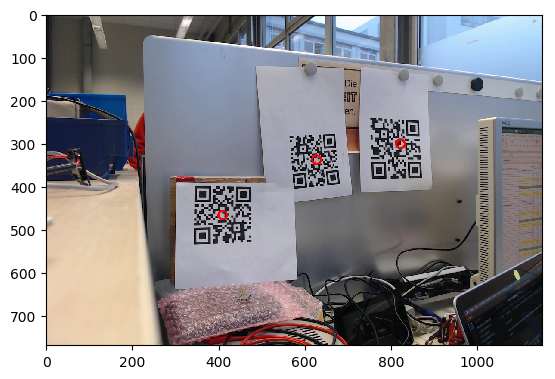

In [38]:

ret, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = cv2.resize(frame, (0,0), fx=0.5, fy=0.5)
codes = decode(frame)
print(" Codes gefunden:", codes)
for code in codes:
    qrCode = QR(code.data.decode())
    qrCode.set_pos(QR.calc_position(frame, code.rect))
    qrCode.debug()
    
    show_code_center(frame=frame, code=qrCode)
    
    

In [39]:

cap.release()

In [42]:
import sys
import os
db_file = "log.sqlite"
folder = sys.path[0]
db_path = os.path.join(folder, db_file)
db_path


'/home/pi/dev/log.sqlite'

In [1]:
import serial
import io
import time

In [2]:
ser = serial.Serial("/dev/ttyACM0", 9600, timeout=5.0)
sio = io.TextIOWrapper(io.BufferedRWPair(ser, ser))

In [3]:
endtime = time.time()+10
while time.time() < endtime:
    text = sio.readline()
    if text.startswith("$GNRMC") or text.startswith("$GPRMC"):
        print(text)        
    if text.startswith("$GNGGA") or text.startswith("$GPGGA"):
        print(text)

$GNRMC,073844.00,A,4847.40937,N,01124.73776,E,0.536,,261022,,,A*65

$GNGGA,073844.00,4847.40937,N,01124.73776,E,1,05,1.63,366.2,M,46.6,M,,*48

$GNRMC,073845.00,A,4847.41027,N,01124.73642,E,0.674,,261022,,,A*6E

$GNGGA,073845.00,4847.41027,N,01124.73642,E,1,06,1.37,365.9,M,46.6,M,,*4C

$GNRMC,073846.00,A,4847.41060,N,01124.73757,E,0.884,,261022,,,A*6A

$GNGGA,073846.00,4847.41060,N,01124.73757,E,1,06,1.37,365.7,M,46.6,M,,*47

$GNRMC,073847.00,A,4847.41110,N,01124.73812,E,1.210,,261022,,,A*65

$GNGGA,073847.00,4847.41110,N,01124.73812,E,1,06,1.37,366.0,M,46.6,M,,*4A

$GNRMC,073848.00,A,4847.41173,N,01124.73778,E,0.741,,261022,,,A*6C

$GNGGA,073848.00,4847.41173,N,01124.73778,E,1,05,2.52,365.5,M,46.6,M,,*46

$GNRMC,073849.00,A,4847.41105,N,01124.73871,E,0.572,,261022,,,A*68

$GNGGA,073849.00,4847.41105,N,01124.73871,E,1,05,2.52,365.1,M,46.6,M,,*44

$GNRMC,073850.00,A,4847.41098,N,01124.73885,E,0.321,,261022,,,A*6E



In [5]:
qr1 = cv2.imread("IMG_4881.jpg")
detectedCodes = decode(qr1)
print(detectedCodes)
print("height, width, colours:",qr1.shape)

[ WARN:0@825.014] global /home/pi/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('IMG_4881.jpg'): can't open/read file: check file path/integrity


TypeError: cannot unpack non-iterable NoneType object

In [6]:
class QrCode():
    def __init__(self, data, angle_h, angle_v, area_p, image):
        self.data = data
        self.angle_h = angle_h
        self.angle_v = angle_v
        self.area_partial = area_p
        self.image = image
    
    def print_detail(self):
        print("Code Details:")
        print("data:", self.data)
        print("angle_h:", self.angle_h)
        print("angle_v", self.angle_v)
        print("area_partial", self.area_partial)
        

In [7]:
cv2.rectangle?

Docstring:
rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
.   @brief Draws a simple, thick, or filled up-right rectangle.
.   
.   The function cv::rectangle draws a rectangle outline or a filled rectangle whose two opposite corners
.   are pt1 and pt2.
.   
.   @param img Image.
.   @param pt1 Vertex of the rectangle.
.   @param pt2 Vertex of the rectangle opposite to pt1 .
.   @param color Rectangle color or brightness (grayscale image).
.   @param thickness Thickness of lines that make up the rectangle. Negative values, like #FILLED,
.   mean that the function has to draw a filled rectangle.
.   @param lineType Type of the line. See #LineTypes
.   @param shift Number of fractional bits in the point coordinates.



rectangle(img, rec, color[, thickness[, lineType[, shift]]]) -> img
.   @overload
.   
.   use `rec` parameter as alternative specification of the drawn rectangle: `r.tl() and
.   r.br()-Point(1,1)` are opposite corners
Type:      builtin_function

In [8]:
CAMERA_ANGLE = 90

def get_code_angles(img_width, img_height, qode_center):
    # bestimmen der Kamera-Winkel in Abhängigkeit von der Bildausrichtung
    if img_width > img_height:
        cam_angle_h = int(CAMERA_ANGLE)
        cam_angle_v = int(CAMERA_ANGLE/img_width*img_height) 
    else:
        cam_angle_h = int(CAMERA_ANGLE/img_height*img_width) 
        cam_angle_v = int(CAMERA_ANGLE)
    # Code-Position in Winkeln angeben
    # vertikal: oben = positiv
    # horizontal: rechts = positiv
    code_hor_pos, code_vert_pos = qode_center
    #horizontaler Winkel
    code_angle_h = (code_hor_pos - img_width//2)*cam_angle_h / img_width
    code_angle_v = (img_height//2 - code_vert_pos)*cam_angle_v/img_height # hier gedreht da oben 0 ist
    
    return (code_angle_h, code_angle_v)

def get_code_area_part(img_width, img_height, rect):
    img_area = img_height*img_width
    _, _, c_height, c_width = rect
    code_area = c_height * c_width
    return code_area/img_area
    
    
        
def get_center_from_rect(rect, img):
    left, top, height, width = rect
    center = (left+width//2, top+height//2)
    img_ret = cv2.rectangle(img, (left, top),(left+width, top+height), (0, 255, 0), 3 )
    return center, img_ret
    
    
    
def get_codes_from_img(qr_img):
    image_marked = qr_img.copy()
    found_codes = []
    img_h, img_w, num_colours = qr_img.shape
    detectedCodes = decode(qr_img)
    for code in detectedCodes:
        data = code.data.decode()
        rect_center, image_marked = get_center_from_rect(code.rect, image_marked)
        angle_h, angle_v = get_code_angles(img_w, img_h, rect_center)
        area_part = get_code_area_part(img_w, img_h, code.rect)
        qrCode = QrCode(data, angle_h, angle_v, area_part, image_marked)
        found_codes.append(qrCode)
        
    return found_codes
    


In [9]:
qr_img = cv2.imread("IMG_4880_6.jpg")
codes_in_pic = get_codes_from_img(qr_img)
qr_img = cv2.cvtColor(qr_img, cv2.COLOR_BGR2RGB)
    
for c in codes_in_pic:
    c.print_detail()
    plt.imshow(c.image)

[ WARN:0@851.113] global /home/pi/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('IMG_4880_6.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'copy'

## Voice commands mit vosk

In [2]:
import vosk

In [5]:

import argparse
import queue
import sys
import sounddevice as sd
import time
import pyttsx3

engine = pyttsx3.init()
engine.say("I will speak this text")
engine.runAndWait()

In [80]:

from vosk import Model, KaldiRecognizer
q = queue.Queue()
model = Model("vosk-model-small-de-0.15")

def int_or_str(text):
    """Helper function for argument parsing."""
    try:
        return int(text)
    except ValueError:
        return text

def callback(indata, frames, time, status):
    """This is called (from a separate thread) for each audio block."""
    if status:
        print(status, file=sys.stderr)
    q.put(bytes(indata))

def listenForInput():
    recText = None
    parser = argparse.ArgumentParser(add_help=False)
    parser.add_argument(
        "-l", "--list-devices", action="store_true",
        help="show list of audio devices and exit")
    args, remaining = parser.parse_known_args()
    if args.list_devices:
        print(sd.query_devices())
        parser.exit(0)
    parser = argparse.ArgumentParser(
        description=__doc__,
        formatter_class=argparse.RawDescriptionHelpFormatter,
        parents=[parser])
    parser.add_argument(
        "-f", "--filename", type=str, metavar="FILENAME",
        help="audio file to store recording to")
    parser.add_argument(
        "-d", "--device", type=int_or_str,
        help="input device (numeric ID or substring)")
    parser.add_argument(
        "-r", "--samplerate", type=int, help="sampling rate")
    args = parser.parse_args(remaining)

    try:
        if args.samplerate is None:
            device_info = sd.query_devices(args.device, "input")
            # soundfile expects an int, sounddevice provides a float:
            args.samplerate = int(device_info["default_samplerate"])

        #model = Model(lang="en-us")

        if args.filename:
            dump_fn = open(args.filename, "wb")
        else:
            dump_fn = None

        with sd.RawInputStream(samplerate=args.samplerate, blocksize = 8000, device=args.device,
                dtype="int16", channels=1, callback=callback):
            print("#" * 80)
            print("Press Ctrl+C to stop the recording")
            print("#" * 80)

            rec = KaldiRecognizer(model, args.samplerate)
            time_stopp = time.time()+ 5
            while True and time.time() < time_stopp:
                data = q.get()
                if rec.AcceptWaveform(data):
                    recText = rec.Result()
                    print(recText)
                    break
                else:
                    pass
                # print(rec.PartialResult())
                if dump_fn is not None:
                    dump_fn.write(data)

    except KeyboardInterrupt:
        print("\nDone")
        parser.exit(0)
    except Exception as e:
        parser.exit(type(e).__name__ + ": " + str(e))
    return recText

LOG (VoskAPI:ReadDataFiles():model.cc:213) Decoding params beam=10 max-active=3000 lattice-beam=2
LOG (VoskAPI:ReadDataFiles():model.cc:216) Silence phones 1:2:3:4:5:6:7:8:9:10
LOG (VoskAPI:RemoveOrphanNodes():nnet-nnet.cc:948) Removed 0 orphan nodes.
LOG (VoskAPI:RemoveOrphanComponents():nnet-nnet.cc:847) Removing 0 orphan components.
LOG (VoskAPI:ReadDataFiles():model.cc:248) Loading i-vector extractor from vosk-model-small-de-0.15/ivector/final.ie
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:183) Computing derived variables for iVector extractor
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:204) Done.
LOG (VoskAPI:ReadDataFiles():model.cc:282) Loading HCL and G from vosk-model-small-de-0.15/graph/HCLr.fst vosk-model-small-de-0.15/graph/Gr.fst
LOG (VoskAPI:ReadDataFiles():model.cc:303) Loading winfo vosk-model-small-de-0.15/graph/phones/word_boundary.int


In [18]:
plainText = recText[14:-3]
engine.say(plainText)
engine.runAndWait()

In [88]:
_einer = {"null":0, "eins":1, "ein":1, "zwei":2, "drei":3, "vier":4, "fünf":5, "sechs":6, "sieben":7, "sieb":7, "acht":8, "neun":9, "elf":11, "zwölf":12,
          "zwanzig":20, "dreißig":30, "vierzig":40, "fünfzig":50, "sechzig":60, "siebzig":70, "achtzig":80, "neunzig":90,
          }
_zehner = {"zehn":10, "zwanzig":20, "dreißig":30, "vierzig":40, "fünfzig":50, "sechzig":60, "siebzig":70, "achtzig":80, "neunzig":90}

def get_einer(text):
    return  _einer.get(text, 0)

def get_zehner(text):
    return _zehner.get(text, 0)

def textToNumber(number_in_text:str):
    number = 0
    if "hundert" in number_in_text:
        hunderter, _, rest = number_in_text.partition("hundert")
        hunderter.strip()
        rest.strip()
        hdt = get_einer(hunderter)
        if(hdt > 0):
            number = hdt*100
        else:
            number = 100
        if "und" in rest:
            einer, _, zehner = rest.partition("und")
            number = number + get_einer(einer)+get_zehner(zehner)
        elif "zehn" in rest:
            number = number + get_einer(rest[:-4]) + 10
        else:
            number = number + get_einer(rest)   
    else:
        if "und" in number_in_text:
            einer, _, zehner = number_in_text.partition("und")
            number = get_einer(einer)+get_zehner(zehner)
        elif "zehn" in number_in_text:
            number = get_einer(number_in_text[:-4]) + 10
        else:
            number = get_einer(number_in_text)
    return number
        
        
        

In [94]:
engine.say("Wie alt bist du?")
engine.runAndWait()
age_text = listenForInput()
age = textToNumber(age_text[14:-3])
print("Alter:", age)

################################################################################
Press Ctrl+C to stop the recording
################################################################################
{
  "text" : "eins"
}
Alter: 1


## Datenbank mit sqlite3

In [3]:
import sqlite3
import pandas as pd
import plotly.express as px


In [4]:

sql_con = sqlite3.connect("trace.sqlite")
df = pd.read_sql_query("select * from loggings", sql_con)
df


,id,code,posx,posy,datetime,lat,lon,speed,direction
0,1,logging_only,0,0,2022-10-27 10:12:18,48.790755,11.411377,4.7,298.46
1,2,logging_only,0,0,2022-10-27 10:13:22,48.790672,11.411652,1.6,NaN
2,3,logging_only,0,0,2022-10-27 10:13:32,48.790638,11.411753,0.3,NaN
3,4,logging_only,0,0,2022-10-27 10:17:15,48.789999,11.413732,0.6,NaN
4,5,logging_only,0,0,2022-10-27 10:17:25,48.790028,11.413600,2.1,NaN
...,...,...,...,...,...,...,...,...,...
598,599,logging_only,0,0,2022-10-28 03:45:41,48.793067,11.406102,21.9,180.23
599,600,logging_only,0,0,2022-10-28 03:45:51,48.792298,11.405904,38.2,187.61
600,601,logging_only,0,0,2022-10-28 03:46:01,48.791447,11.405699,20.8,178.80
601,602,logging_only,0,0,2022-10-28 03:46:11,48.791382,11.406055,5.2,NaN


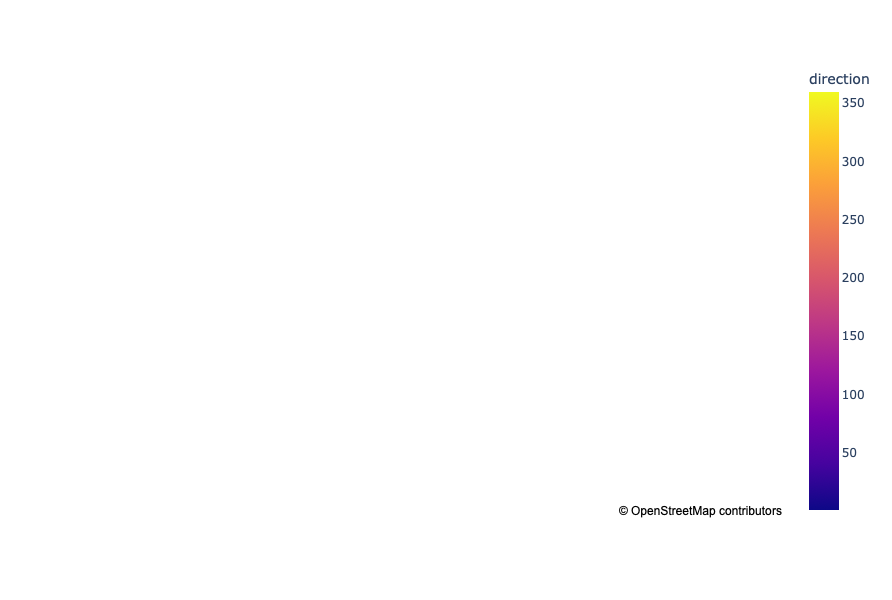

In [10]:
fig = px.scatter_mapbox(df, lat="lat", lon="lon", hover_name="direction", color="direction", zoom=8, mapbox_style="open-street-map", width=800, height=600)
fig.show()

In [103]:
data = sql_cur.execute("SELECT * from images")

In [106]:
def convertToBinary(filename):
    """takes a filename and returns the file in binary format

    Args:
        filename (_type_): full path

    Returns:
        _type_: data (binary)
    """
    with open(filename, "rb")as f:
        data = f.read()
    return data

In [107]:
def insertBlob(table, picture, title):
    try:
        sqlConnection = sqlite3.connect("test.db")
        cur = sqlConnection.cursor()
        sqlite_insert_blob_query = "INSERT INTO images(title, image) VALUES (?, ?)"
        image_bin = convertToBinary(picture)
        cur.execute(sqlite_insert_blob_query, title, image_bin)
        sqlConnection.commit()
    except:
        print("Error DB handling")
    finally:
        sqlConnection.close()